In [2]:
import models
from models import model, create_cd_cluster, cd_diagram, bt_plot
from dataset_management import get_dataset, convert_to_autorank
from autorank import autorank, create_report, plot_stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

algorithm="algorithm";benchmark="bench_prior";seed="seed";budget="used_fidelity"
ds_anon=get_dataset(dataset_name="fig5_full_anon")
ds_pb=get_dataset(dataset_name="fig5_full")
thesis_1 = {"priors":["bad"],"slices":[5,10,15,20]};thesis_1["data"]=ds_anon.loc[ds_anon["prior"].isin(thesis_1["priors"])]
thesis_2 = {"priors":["bad"],"slices":[[0,5],[0,10],[0,15],[0,20]]};thesis_2["data"]=ds_pb.loc[ds_pb["prior"].isin(thesis_2["priors"])]

✅ Loading data done                                                                                 
✅ Loading data done                                                                                 


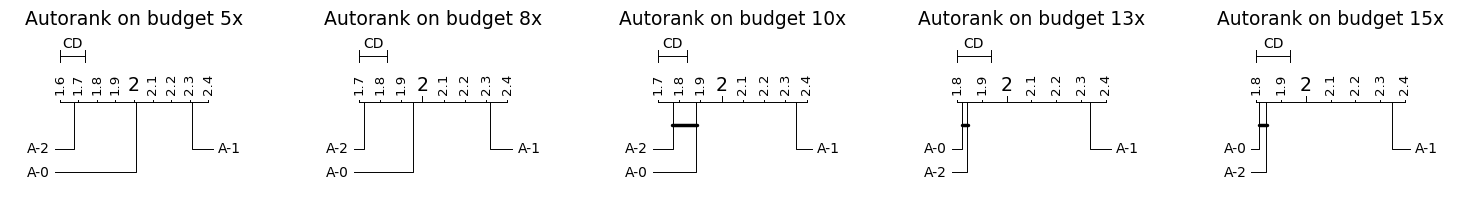

In [12]:
#Pres plot: Autorank on data AT 5,8,10,13,15
plot_0=bt_plot(slices=[5,8,10,13,15],rows=1,dataset=thesis_1["data"],algorithm_var=algorithm,budget_var=budget)
plot_0.change_row(0,None,globality=False,loss="normalized_regret",titles=["Autorank on budget 5x","Autorank on budget 8x","Autorank on budget 10x","Autorank on budget 13x","Autorank on budget 15x"])
fig=plt.figure(plot_0.show())
plt.savefig(dpi=300,pad_inches=0, bbox_inches="tight",fname="img/pres_autorank_58101315")

c:\Users\Amega\Git\significance_analysis\.venv_3_10_0\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\Amega\Git\significance_analysis\.venv_3_10_0\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\Amega\Git\significance_analysis\.venv_3_10_0\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\Amega\Git\significance_analysis\.venv_3_10_0\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\Amega\Git\significance_analysis\.venv_3_10_0\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-v

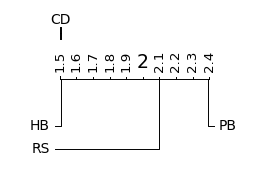

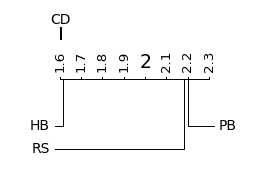

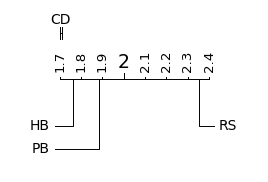

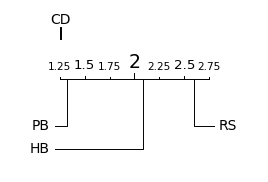

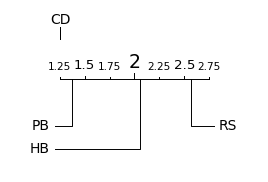

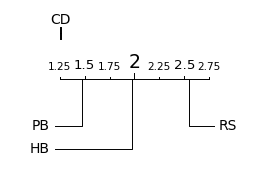

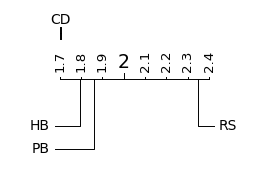

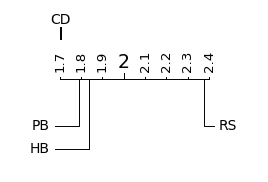

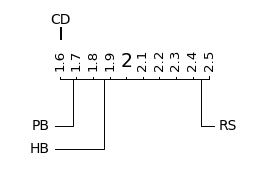

In [3]:
for prior in [["bad"],["at25"],["bad","at25"]]:
    for slice in [[0,10],[0,20],[5,15]]:
        plot_0=bt_plot(slices=[slice],rows=1,dataset=ds_pb.loc[ds_pb["prior"].isin(prior)],algorithm_var=algorithm,budget_var=budget)
        plot_0.change_row(0,None,globality=False,loss="normalized_regret",titles=[""])
        fig=plt.figure(plot_0.show())
        plt.savefig(dpi=300,pad_inches=0, bbox_inches="tight",fname=f"img/pres_autorank_{prior}_{slice[0]}to{slice[1]}")

P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates


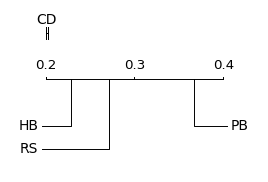

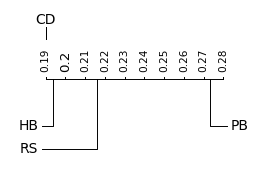

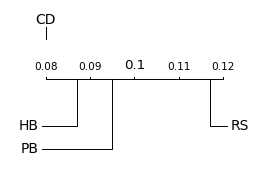

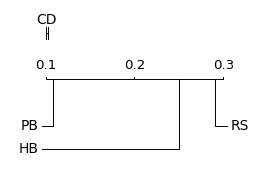

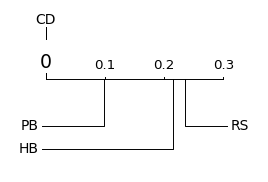

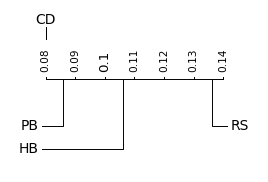

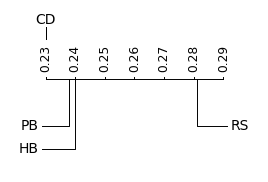

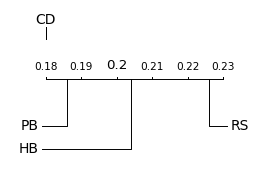

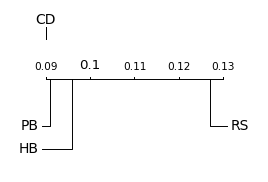

In [11]:
#Pres plot: LMEM on data 5-15, good & bad prior
for prior in [["bad"],["at25"],["bad","at25"]]:
    for slice in [[0,10],[0,20],[5,15]]:
        plot_0=bt_plot(slices=[slice],rows=1,dataset=ds_pb.loc[ds_pb["prior"].isin(prior)],algorithm_var=algorithm,budget_var=budget)
        plot_0.change_row(0,f"{algorithm}+{algorithm}:{budget}+{budget}+(1|{benchmark})",globality=False,loss="normalized_regret",titles=[""])
        fig=plt.figure(plot_0.show())
        plt.savefig(dpi=300,pad_inches=0, bbox_inches="tight",fname=f"img/pres_lmem_{prior}_{slice[0]}to{slice[1]}")


# plt.savefig(dpi=300,pad_inches=0, bbox_inches="tight",fname="img/pres_lmem_5to15")

P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates


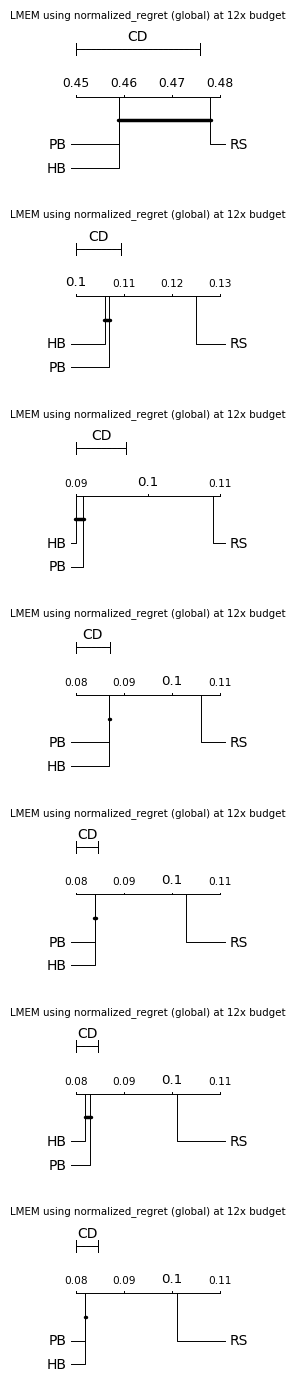

In [5]:
#Pres plot: LMEM global on data 0-12
plot_0=bt_plot(slices=[12],rows=7,dataset=thesis_2["data"],algorithm_var=algorithm,budget_var=budget)
# plot_0.change_row(0,f"{algorithm}+(1|{benchmark})",globality=False,loss="normalized_regret",titles=["LMEM on budget 5-15x"])
plot_0.change_row(0,f"{algorithm}+{budget}+(1|{benchmark})",globality=True,loss="normalized_regret",global_start=0)#,titles=["LMEM on budget 5-15x"])
plot_0.change_row(1,f"{algorithm}+{budget}+(1|{benchmark})",globality=True,loss="normalized_regret",global_start=5)#,titles=["LMEM on budget 5-15x"])
plot_0.change_row(2,f"{algorithm}+{budget}+(1|{benchmark})",globality=True,loss="normalized_regret",global_start=8)#,titles=["LMEM on budget 5-15x"])
plot_0.change_row(3,f"{algorithm}+{budget}+(1|{benchmark})",globality=True,loss="normalized_regret",global_start=9)#,titles=["LMEM on budget 5-15x"])
plot_0.change_row(4,f"{algorithm}+{budget}+(1|{benchmark})",globality=True,loss="normalized_regret",global_start=10)#,titles=["LMEM on budget 5-15x"])
plot_0.change_row(5,f"{algorithm}+{budget}+(1|{benchmark})",globality=True,loss="normalized_regret",global_start=11)#,titles=["LMEM on budget 5-15x"])
plot_0.change_row(6,f"{algorithm}+{budget}+(1|{benchmark})",globality=True,loss="normalized_regret",global_start=11.5)#,titles=["LMEM on budget 5-15x"])
# plot_0.change_row(0,None,globality=False,loss="normalized_regret",titles=["LMEM on budget 5-15x"])
fig=plt.figure(plot_0.show())
# plt.savefig(dpi=300,pad_inches=0, bbox_inches="tight",fname="img/pres_lmem_5to15")

P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates


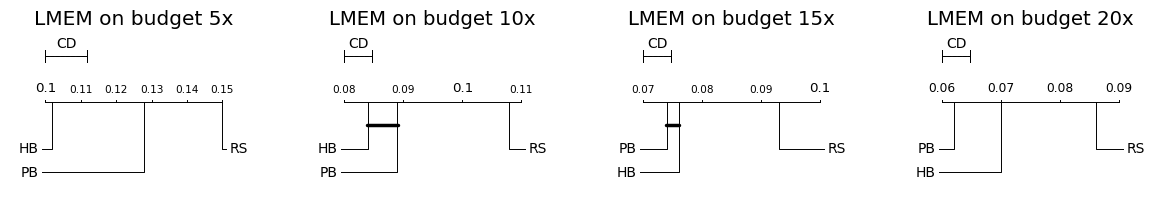

In [6]:
#First plot: LMEM on data AT 5,10,15,20
plot_1=bt_plot(slices=[5,10,15,20],rows=1,dataset=thesis_2["data"],algorithm_var=algorithm,budget_var=budget)
plot_1.change_row(0,f"{algorithm}+(1|{benchmark})",globality=False,loss="normalized_regret",titles=["LMEM on budget 5x","LMEM on budget 10x","LMEM on budget 15x","LMEM on budget 20x"])
fig=plt.figure(plot_1.show())
plt.savefig(dpi=300,pad_inches=0, bbox_inches="tight",fname="img/case_study_slices")

P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates


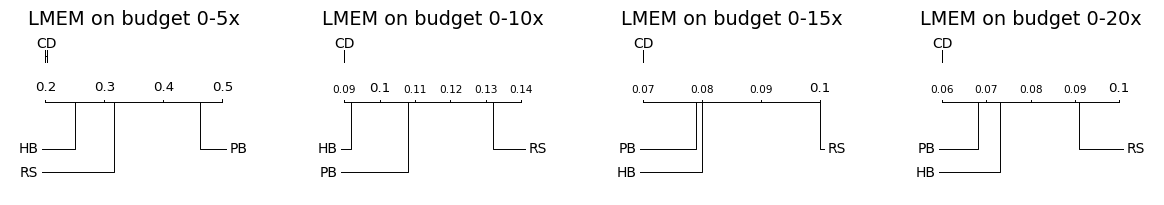

In [16]:
#Second plot: LMEM on data on ranges 0-5,0-10,0-15,0-20
plot_1=bt_plot(slices=thesis_2["slices"],rows=1,dataset=thesis_2["data"],algorithm_var=algorithm,budget_var=budget)
plot_1.change_row(0,f"{algorithm}+{algorithm}:{budget}+(1|{benchmark})",globality=False,loss="normalized_regret",titles=["LMEM on budget 0-5x","LMEM on budget 0-10x","LMEM on budget 0-15x","LMEM on budget 0-20x"])
fig=plt.figure(plot_1.show())
plt.savefig(dpi=300,pad_inches=0, bbox_inches="tight",fname="img/case_study_ranges")

P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates


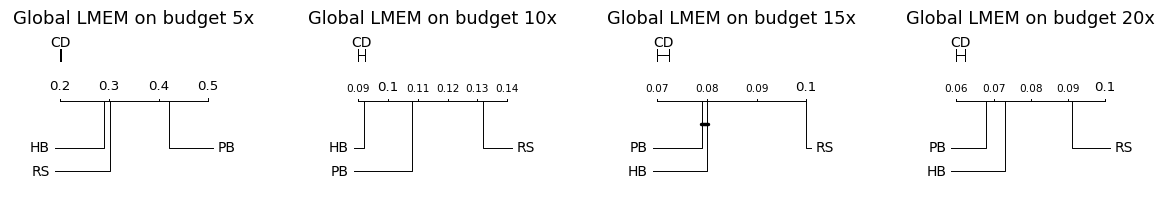

In [15]:
#Third plot: LMEM on data on ranges 0-5,0-10,0-15,0-20 global
plot_1=bt_plot(slices=thesis_2["slices"],rows=1,dataset=thesis_2["data"],algorithm_var=algorithm,budget_var=budget)
plot_1.change_row(0,f"{algorithm}+(1|{benchmark})",globality=True,loss="normalized_regret",titles=["Global LMEM on budget 5x","Global LMEM on budget 10x","Global LMEM on budget 15x","Global LMEM on budget 20x"])
fig=plt.figure(plot_1.show())
plt.savefig(dpi=300,pad_inches=0, bbox_inches="tight",fname="img/case_study_global")

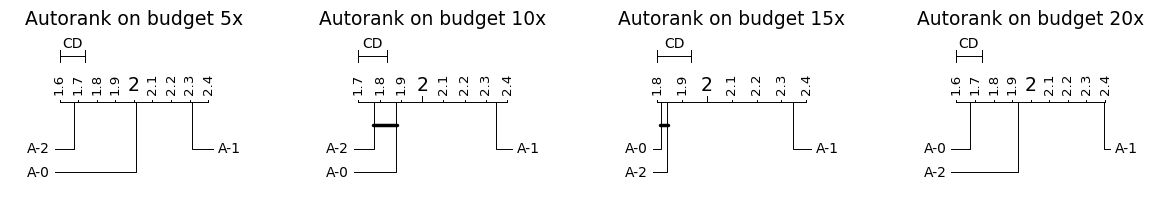

In [2]:
# First plot: Autorank on data AT 5, AT 10, AT 15, AT 20x budget given the raw value
plot_1=bt_plot(slices=thesis_1["slices"],rows=1,dataset=thesis_1["data"],algorithm_var=algorithm,budget_var=budget)
plot_1.change_row(0,None,globality=False,loss="normalized_regret",titles=["Autorank on budget 5x","Autorank on budget 10x","Autorank on budget 15x","Autorank on budget 20x"])
fig=plt.figure(plot_1.show())
plt.savefig(dpi=300,pad_inches=0, bbox_inches="tight",fname="img/1_anon")

P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates


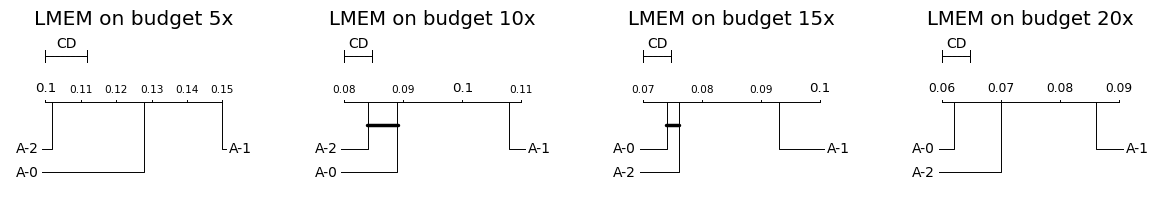

In [3]:
# Second plot: LMEM on same data
plot_2=bt_plot(slices=thesis_1["slices"],rows=1,dataset=thesis_1["data"],algorithm_var=algorithm,budget_var=budget)
plot_2.change_row(0,f"{algorithm}+(1|{benchmark})",globality=False,loss="normalized_regret",titles=["LMEM on budget 5x","LMEM on budget 10x","LMEM on budget 15x","LMEM on budget 20x"])
fig=plt.figure(plot_2.show())
plt.savefig(dpi=300,pad_inches=0, bbox_inches="tight",fname="img/2_anon")

P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates


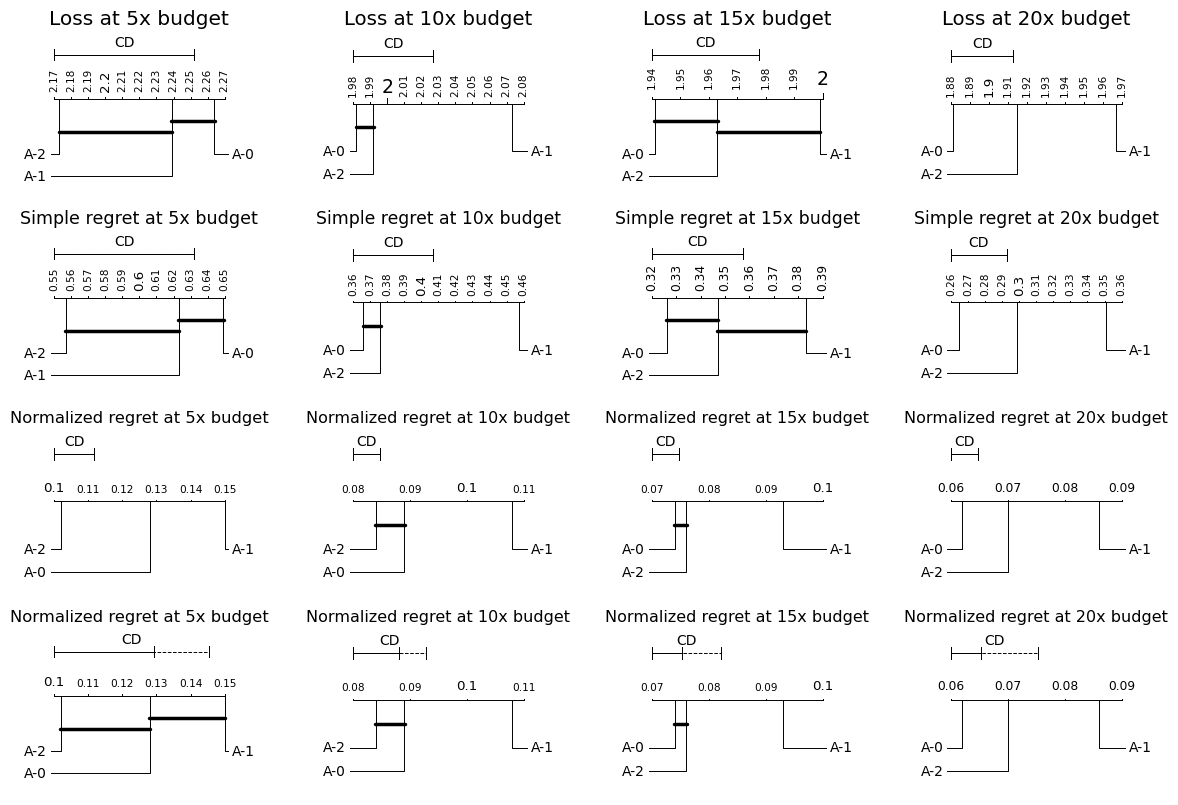

In [4]:
# Third plot: LMEM on same data but with other effects and metrics
plot_3=bt_plot(slices=thesis_1["slices"],rows=4,dataset=thesis_1["data"],algorithm_var=algorithm,budget_var=budget)
plot_3.change_row(0,f"{algorithm}+(1|{benchmark})",globality=False,loss="value",titles=["Loss at 5x budget","Loss at 10x budget","Loss at 15x budget","Loss at 20x budget"])
plot_3.change_row(1,f"{algorithm}+{algorithm}:{benchmark}",globality=False,loss="simple_regret",titles=["Simple regret at 5x budget","Simple regret at 10x budget","Simple regret at 15x budget","Simple regret at 20x budget"])
plot_3.change_row(2,f"{algorithm}+{algorithm}:{benchmark}",globality=False,loss="normalized_regret",titles=["Normalized regret at 5x budget","Normalized regret at 10x budget","Normalized regret at 15x budget","Normalized regret at 20x budget"])
plot_3.change_row(3,f"{algorithm}+({algorithm}|{benchmark})",globality=False,loss="normalized_regret",titles=["Normalized regret at 5x budget","Normalized regret at 10x budget","Normalized regret at 15x budget","Normalized regret at 20x budget"])
fig=plt.figure(plot_3.show())
plt.savefig(dpi=300,pad_inches=0, bbox_inches="tight",fname="img/3_anon")


c:\Users\Amega\Git\significance_analysis\.venv_3_10_0\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


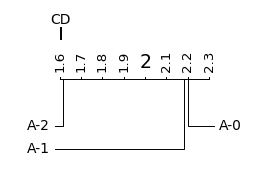

In [5]:
# Fourth plot: Autorank on data 0-24
plot_4=bt_plot(slices=[[0,20]],rows=1,dataset=thesis_1["data"],algorithm_var=algorithm,budget_var=budget)
plot_4.change_row(0,None,globality=False,loss="normalized_regret",titles=[""])
fig=plt.figure(plot_4.show())
plt.savefig(dpi=300,pad_inches=0, bbox_inches="tight",fname="img/4_anon")

P-values adjusted by tukey method for family of 3 estimates


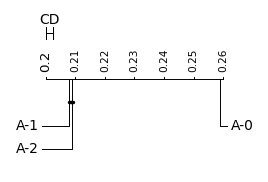

In [6]:
# Fifth plot: LMEM on data 0-24, model with budget as effect, normalized regret
plot_5=bt_plot(slices=[[0,20]],rows=1,dataset=thesis_1["data"],algorithm_var=algorithm,budget_var=budget)
plot_5.change_row(0,f"{algorithm}+(1|{benchmark})",globality=False,loss="normalized_regret",titles=[""])
fig=plt.figure(plot_5.show())
plt.savefig(dpi=300,pad_inches=0, bbox_inches="tight",fname="img/5_anon")

P-values adjusted by tukey method for family of 3 estimates


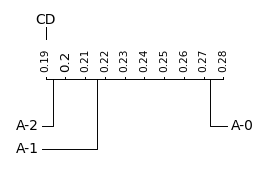

In [7]:
plot_5_2=bt_plot(slices=[[0,20]],rows=1,dataset=thesis_1["data"],algorithm_var=algorithm,budget_var=budget)
plot_5_2.change_row(0,f"{algorithm}+{algorithm}:{budget}+(1|{benchmark})",globality=False,loss="normalized_regret",titles=[""])
fig=plt.figure(plot_5_2.show())
plt.savefig(dpi=300,pad_inches=0, bbox_inches="tight",fname="img/5_anon_budget")

P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates


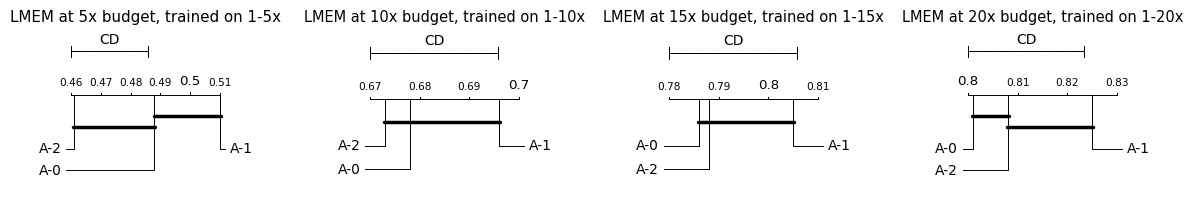

In [8]:
# Sixth plot: LMEM trained on 0-24, with slices 0-6, 6-12, 12-18, 18-24
plot_6=bt_plot(slices=[5,10,15,20],rows=1,dataset=thesis_1["data"],algorithm_var=algorithm,budget_var=budget)
plot_6.change_row(0,f"{algorithm}+{budget}+(1|{benchmark})",globality=True,loss="normalized_regret",titles=["LMEM at 5x budget, trained on 1-5x","LMEM at 10x budget, trained on 1-10x","LMEM at 15x budget, trained on 1-15x","LMEM at 20x budget, trained on 1-20x"])
fig=plt.figure(plot_6.show())
plt.savefig(dpi=300,pad_inches=0, bbox_inches="tight",fname="img/6_anon")

P-values adjusted by tukey method for family of 3 estimates


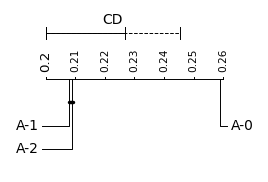

In [4]:
# Background plot CD-Diagram example
plot_cd=bt_plot(slices=[[0,20]],rows=1,dataset=thesis_1["data"],algorithm_var=algorithm,budget_var=budget)
plot_cd.change_row(0,f"{algorithm}+({algorithm}|{benchmark})",globality=False,loss="normalized_regret",titles=[""])
fig=plt.figure(plot_cd.show())
plt.savefig(dpi=300,pad_inches=0, bbox_inches="tight",fname="img/cd_example")